In [1]:
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML
%matplotlib inline
import numpy as np

import pyradi.ryfiles as ryfiles
import pyradi.ryplot as ryplot
import pyradi.ryutils as ryutils
import pyradi.ry3dnoise as ry3dnoise

## Three dimensional noise analysis

The [`pyradi.ry3dnoise`](http://nelisw.github.io/pyradi-docs/_build/html/ry3dnoise.html#module-pyradi.ry3dnoise) module provides a set of functions to aid in the calculation of 3D noise parameters from
noise images. The functions are based on the work done by John D'Agostino and Curtis Webb.
For details see "3-D Analysis Framwork and Measurement Methodology for Imaging System
Nioise" p110-121 in "Infrared Imaging Systems: Design, Analysis, Modelling, and Testing II",
Holst, G. C., ed., Volume 1488, SPIE (1991), DOI 10.1117/12.45794.

The three-dimensional noise analysis requires a sequence of images. The functions all receive an `numpy.ndarray[frames][rows][cols]` as first argument, where the array is a three-dimensional sequence of images.  The functions in this module are:

- `getNT(imgSeq)` Average for all pixels as a function of time/frames. Represents noise which consists of fluctuations in the temporal direction affecting the mean of each frame. Returns the noise (double), frame-to-frame intensity variation.
- `getNVH(imgSeq)` Average over all frames, for each pixel. Represents non-uniformity spatial noise that does not change from frame-to-frame. Returns the noise (double), fixed spatial noise.
- `getNTV(imgSeq)` Average for each row and frame over all columns. Represents variations in row averages that change from frame-to-frame.  Returnsthe  noise (double), row temporal noise.
- `getNTH(imgSeq)` Average for each column and frame over all rows. Represents variations in column averages that change from frame-to-frame. Returnsthe noise (double), column temporal noise.
- `def getNV(imgSeq)` Average for each column over all frames and rows. Represents variations in row averages that are fixed in time.  Returns the noise (double), fixed row noise.
- `getNH(imgSeq)` Average for each row over all frames and cols. Represents variations in column averages that are fixed in time. Returns the noise (double), fixed column noise.
- `getNTVH(imgSeq)`Noise for each row,  frame and column. Represents random noise in the detector and electronics. Returns the noise (double), temporal pixel noise.
- `getTotal(imgSeq)` Total system noise. Returns the noise (double), total system noise.  

The following example reads a file with an image sequence, and proceeds to calculate the three-dimensional noise parameters.

****  If saveFig does not work inside the notebook please comment out the line "%matplotlib inline" 
To disable ryplot warnings, set doWarning=False

(19, 100, 100) (frames, rows,cols) processed from ../data/sensornoise.raw - see results in ../out/sensornoise.txt

19 Frames read from ../data/sensornoise.raw

Image average S       :   2033.162 
Total system noise    :      9.940 

Fixed/spatial noise  | Temporal noise      | Variation effect
---------------------|---------------------|-----------------
Nh    :      3.138   | Nth   :      1.224  | Column 
Nv    :      0.378   | Ntv   :      3.012  | Row 
Nvh   :      2.038   | Ntvh  :      8.601  | Pixel 
                     | Nt    :      0.346  | Frame 
****  If saveFig does not work inside the notebook please comment out the line "%matplotlib inline" 
To disable ryplot warnings, set doWarning=False


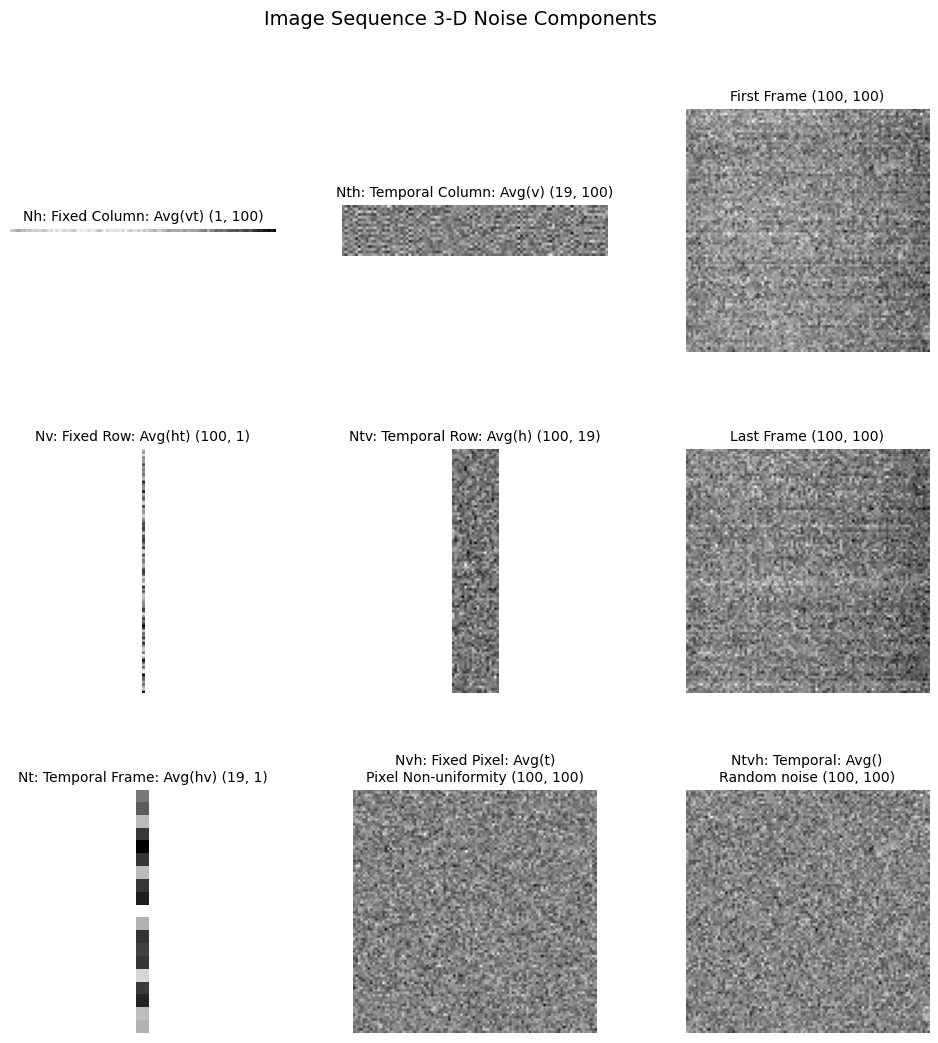

In [2]:
dlNames = ['../data/sensornoise.raw']

if dlNames:
    rows = 100
    cols = 100
    outfilename = '../out/sensornoise.txt'

    framesToLoad = range(1, 21, 1)
    frames, img    = ryfiles.readRawFrames(dlNames[0], rows, cols, np.uint16, framesToLoad)

    if frames > 0:
        P = ryplot.Plotter(1, 1, 1,'Simulated noise', figsize=(12, 8))
        P.showImage(1, img[0])
        P.saveFig('../out/rawframe0.png')

        outfile = open(outfilename, 'w')
        outfile.write('\n{0} Frames read from {1}\n'.format(frames, dlNames[0]))
        outfile.write('\nImage average S       : {0:10.3f} \n'.format(ry3dnoise.getS(img)))
        outfile.write('Total system noise    : {0:10.3f} \n\n'.format(ry3dnoise.getTotal(img)))
        outfile.write('Fixed/spatial noise  | Temporal noise      | Variation effect\n')
        outfile.write('---------------------|---------------------|-----------------\n')
        outfile.write('Nh    : {0:10.3f}   | Nth   : {1:10.3f}  | Column \n'.format(ry3dnoise.getNH(img)[0],ry3dnoise.getNTH(img)[0]))
        outfile.write('Nv    : {0:10.3f}   | Ntv   : {1:10.3f}  | Row \n'.format(ry3dnoise.getNV(img)[0],ry3dnoise.getNTV(img)[0]))
        outfile.write('Nvh   : {0:10.3f}   | Ntvh  : {1:10.3f}  | Pixel \n'.format(ry3dnoise.getNVH(img)[0],ry3dnoise.getNTVH(img)[0]))
        outfile.write('                     | Nt    : {0:10.3f}  | Frame \n'.format(ry3dnoise.getNT(img)[0]))

        print('\n({0}, {3}, {4}) (frames, rows,cols) processed from {1} - see results in {2}'.format(frames, dlNames[0], outfilename,rows,cols))

    else:
        print('Error in reading noise images data')

    import os.path    
    if os.path.sep == '/':
        !cat sensornoise.txt
    else:
        !type sensornoise.txt    

    NH = ry3dnoise.getNH(img)[1].reshape(cols).reshape(1,cols)
    NTH = ry3dnoise.getNTH(img)[1].reshape(frames*cols).reshape(frames,cols)
    NV = ry3dnoise.getNV(img)[1].reshape(rows).reshape(rows,1)
    NTV = ry3dnoise.getNTV(img)[1].reshape(frames*rows).reshape(rows,frames)
    NVH = ry3dnoise.getNVH(img)[1].reshape(rows*cols).reshape(rows,cols)
    NTVH = ry3dnoise.getNTVH(img)[1][0,:,:]
    NT = ry3dnoise.getNT(img)[1].reshape(frames).reshape(frames,1)

    P = ryplot.Plotter(1, 3, 3,'Image Sequence 3-D Noise Components', figsize=(12, 12))
    P.showImage(1, NH, ptitle='Nh: Fixed Column: Avg(vt) {}'.format(NH.shape), titlefsize=10)
    P.showImage(2, NTH, ptitle='Nth: Temporal Column: Avg(v) {}'.format(NTH.shape), titlefsize=10)
    P.showImage(4, NV, ptitle='Nv: Fixed Row: Avg(ht) {}'.format(NV.shape), titlefsize=10)
    P.showImage(5, NTV, ptitle='Ntv: Temporal Row: Avg(h) {}'.format(NTV.shape), titlefsize=10)
    P.showImage(8, NVH, ptitle='Nvh: Fixed Pixel: Avg(t)\nPixel Non-uniformity {}'.format(NVH.shape), titlefsize=10)
    P.showImage(9, NTVH, ptitle='Ntvh: Temporal: Avg()\nRandom noise {}'.format(NTVH.shape), titlefsize=10)
    P.showImage(7, NT, ptitle='Nt: Temporal Frame: Avg(hv) {}'.format(NT.shape), titlefsize=10)
    P.showImage(3, img[0,:,:], ptitle='First Frame {}'.format(img[0,:,:].shape), titlefsize=10)
    P.showImage(6, img[-1,:,:], ptitle='Last Frame {}'.format(img[-1,:,:].shape), titlefsize=10)
    P.saveFig('../out/3Dnoise.png')


## Python and module versions, and dates

In [3]:
try:
    import pyradi.ryutils as ryutils
    print(ryutils.VersionInformation('matplotlib,numpy,pyradi,scipy,pandas'))
except:
    print("pyradi.ryutils not found")

Software versions
Python:   3.8.16 64bit [MSC v.1916 64 bit (AMD64)]
IPython:   8.12.0
OS:   Windows 10 10.0.19045 SP0
matplotlib:   3.7.1
numpy:   1.21.0
pyradi:   1.1.4
scipy:   1.9.1
pandas:   2.0.3
Thu Sep 28 11:58:14 2023 South Africa Standard Time
